<a href="https://colab.research.google.com/github/ambideXtrous9/Brand-Logo-Detection-using-TransferLearning/blob/main/load_model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
import tensorflow as tf
import tensorflow_datasets.public_api as tfds

In [2]:
y = ['Adidas','Apple','BMW','Citroen','Cocacola','DHL','Fedex','Ferrari','Ford','Google','HP','Heineken','Intel','McDonalds','Mini','Nbc','Nike','Pepsi','Porsche',
     'Puma','RedBull','Sprite','Starbucks','Texaco','Unicef','Vodafone','Yahoo']

In [3]:
len(y)

27

In [20]:
model = keras.models.load_model('/content/Logo_InceptionV3.model')

In [21]:
BS = 16

In [22]:
from PIL import Image,ImageDraw
def predimage(path,y):
    image = Image.open(path)
    test = load_img(path,target_size=(224,224))
    test = img_to_array(test)
    test = np.expand_dims(test,axis=0)
    test /= 255 
    result = model.predict(test,batch_size = BS)
    y_class = result.argmax(axis=-1)
    result = (result*100)
    result = list(np.around(np.array(result),2))
    i = y_class[0]
    s = result[0][i]
    plt.text(0, 0,y[y_class[0]],size=15,color='purple')
    plt.text(0, 50,s,size=15,color='yellow')
    plt.imshow(image)
    print(result)
    print(y[y_class[0]])

[array([2.000e-02, 2.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e-02,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       9.972e+01, 0.000e+00, 3.000e-02, 7.000e-02, 0.000e+00, 3.000e-02,
       0.000e+00, 0.000e+00, 0.000e+00], dtype=float32)]
Porsche


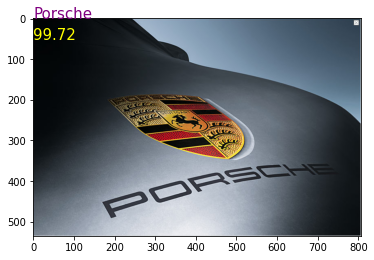

In [24]:
predimage('/content/porsche.jpg',y)

[array([1.000e-02, 9.000e-02, 2.586e+01, 3.000e-02, 3.300e-01, 2.100e-01,
       1.000e-02, 1.250e+00, 2.200e-01, 0.000e+00, 1.000e-02, 8.740e+00,
       0.000e+00, 2.500e-01, 4.311e+01, 7.000e-02, 4.000e-02, 1.800e-01,
       9.800e-01, 0.000e+00, 4.740e+00, 2.000e-02, 1.159e+01, 2.220e+00,
       4.000e-02, 1.000e-02, 0.000e+00], dtype=float32)]
Mini


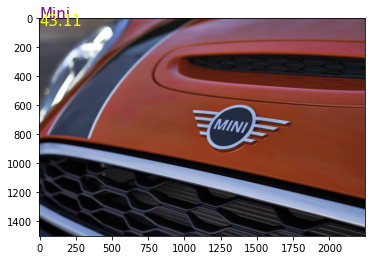

In [25]:
predimage('/content/mini.jpg',y)

[array([5.100e-01, 1.980e+00, 1.000e-02, 1.000e-02, 5.400e-01, 0.000e+00,
       0.000e+00, 6.700e-01, 4.000e-02, 9.000e-02, 1.000e-02, 0.000e+00,
       0.000e+00, 1.000e-01, 2.000e-02, 5.000e-02, 9.155e+01, 4.000e-02,
       0.000e+00, 2.480e+00, 1.260e+00, 6.300e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00], dtype=float32)]
Nike


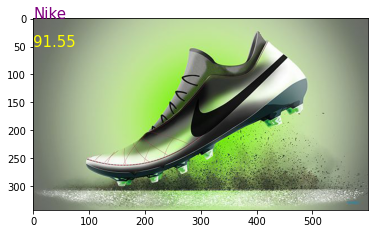

In [26]:
predimage('/content/nike.jpg',y)

[array([2.000e-01, 0.000e+00, 0.000e+00, 1.000e-02, 5.300e-01, 0.000e+00,
       1.000e-02, 4.700e-01, 9.790e+00, 2.800e-01, 0.000e+00, 5.000e-01,
       1.100e-01, 2.000e-02, 1.000e-02, 1.000e-02, 0.000e+00, 0.000e+00,
       5.350e+00, 3.000e-02, 1.400e-01, 8.000e-02, 7.848e+01, 1.800e-01,
       3.770e+00, 1.000e-02, 0.000e+00], dtype=float32)]
Starbucks


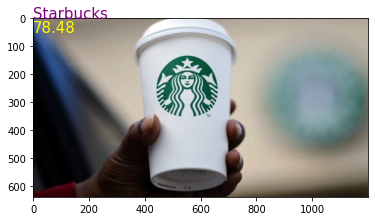

In [29]:
predimage('/content/stb.jpg',y)

[array([0.000e+00, 8.302e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.666e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 3.100e-01, 0.000e+00], dtype=float32)]
Apple


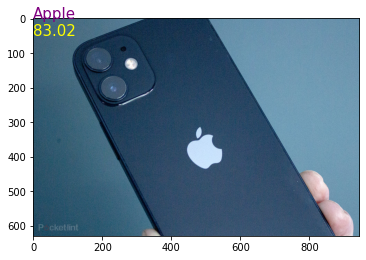

In [32]:
predimage('/content/apl.jpg',y)

[array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 9.991e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e-02, 0.000e+00, 7.000e-02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00], dtype=float32)]
Ford


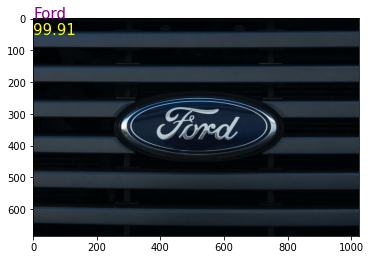

In [31]:
predimage('/content/ford.jpg',y)

[array([0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00, 2.230e+00, 0.000e+00,
       3.929e+01, 0.000e+00, 8.000e-02, 1.000e-02, 2.400e-01, 0.000e+00,
       5.000e-02, 2.300e-01, 4.000e-02, 1.500e-01, 0.000e+00, 2.000e-02,
       0.000e+00, 0.000e+00, 1.000e-02, 1.000e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 5.752e+01, 0.000e+00], dtype=float32)]
Vodafone


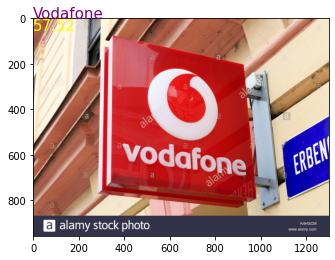

In [38]:
predimage('/content/voda.jpg',y)

[array([1.000e-02, 3.000e-02, 2.000e-02, 1.000e-02, 1.000e-02, 2.600e-01,
       9.562e+01, 0.000e+00, 1.000e-02, 7.800e-01, 2.900e-01, 0.000e+00,
       2.300e-01, 2.100e+00, 1.000e-02, 0.000e+00, 0.000e+00, 3.000e-02,
       0.000e+00, 4.000e-02, 0.000e+00, 1.300e-01, 0.000e+00, 1.000e-02,
       1.000e-02, 3.500e-01, 3.000e-02], dtype=float32)]
Fedex


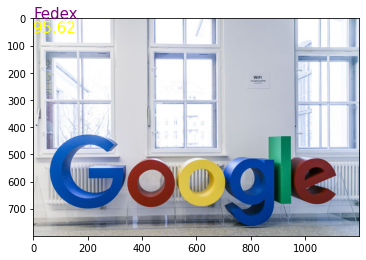

In [34]:
predimage('/content/ggl.jpg',y)

[array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02, 6.688e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00,
       4.600e-01, 0.000e+00, 0.000e+00, 3.263e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00], dtype=float32)]
Heineken


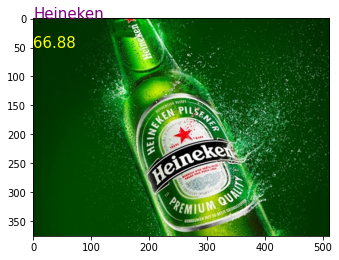

In [36]:
predimage('/content/hnkn.jpg',y)

[array([0.000e+00, 1.000e-02, 9.723e+01, 1.000e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02,
       0.000e+00, 1.000e-02, 2.530e+00, 0.000e+00, 1.000e-02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-01,
       0.000e+00, 0.000e+00, 0.000e+00], dtype=float32)]
BMW


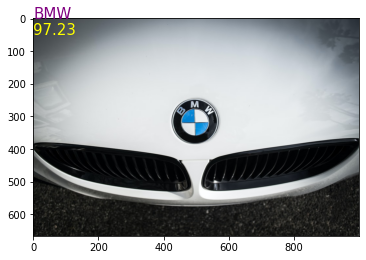

In [37]:
predimage('/content/bmw.jpg',y)

[array([1.000e-02, 7.000e-02, 0.000e+00, 0.000e+00, 2.215e+01, 1.000e-02,
       6.800e-01, 2.000e-02, 6.000e-02, 4.030e+01, 2.000e-02, 1.900e-01,
       6.000e-02, 2.036e+01, 1.000e-02, 2.700e-01, 9.000e-02, 9.000e-02,
       1.000e-02, 1.300e-01, 1.485e+01, 1.800e-01, 0.000e+00, 3.000e-02,
       2.000e-02, 2.400e-01, 1.400e-01], dtype=float32)]
Google


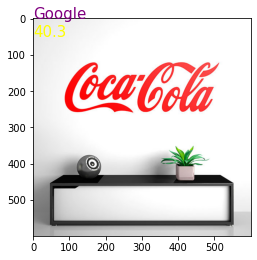

In [41]:
predimage('/content/coke.jpg',y)